In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv('Dataset-SA.csv')
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [3]:
df.tail()

,product_name,product_price,Rate,Review,Summary,Sentiment
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive
205051,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,4,value-for-money,very good but mixing bowl not included is one ...,neutral


In [4]:
df.shape

(205052, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [6]:
df['Sentiment'].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [7]:
df['Sentiment'].value_counts()

Sentiment
positive    166581
negative     28232
neutral      10239
Name: count, dtype: int64

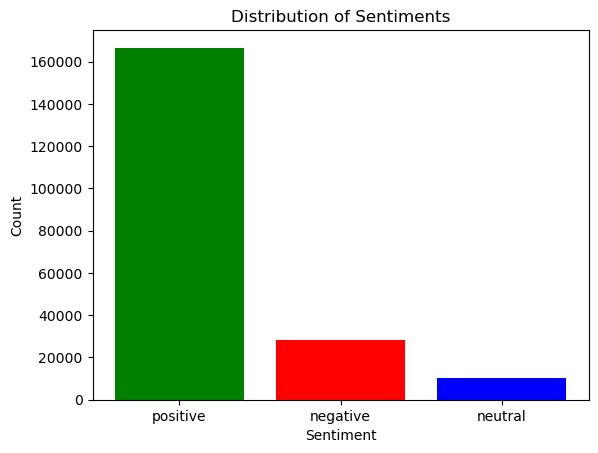

In [8]:
sentiment_counts = df['Sentiment'].value_counts()

# Step 3: Plot a bar graph using Matplotlib
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

In [9]:
from sklearn.preprocessing import LabelEncoder
# Convert sentiment labels to numerical values
label_encoder = LabelEncoder()
df['Sentiment'] = label_encoder.fit_transform(df['Sentiment'])

In [10]:
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,2
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,2
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,2
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,0
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,1


In [11]:
import nltk
import re 
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer 
from sklearn.feature_extraction.text import TfidfVectorizer 

In [12]:
# Text preprocessing
ps = PorterStemmer()
cached_stopwords = set(stopwords.words("english"))

def preprocess_text(review, summary):
    text = str(review) + ' ' + str(summary)
    preprocessed_data = re.sub("[^a-zA-Z]", " ", text)
    preprocessed_data = preprocessed_data.lower()
    preprocessed_data = preprocessed_data.split()
    preprocessed_data = [ps.stem(word) for word in preprocessed_data if word not in cached_stopwords]
    preprocessed_data = " ".join(preprocessed_data)
    return preprocessed_data

In [13]:
# Apply preprocessing to the entire dataset
df['Processed_Text'] = df.apply(lambda row: preprocess_text(row['Review'], row['Summary']), axis=1)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [15]:
# Split data into features (X) and target labels (Y)
X = df['Processed_Text']
Y = df['Sentiment']

In [16]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [17]:
# Vectorize text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [18]:
# Train the classifier with different hyperparameters
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.1, 0.5, 1.0, 2.0]}
model = GridSearchCV(MultinomialNB(), parameters, cv=5)
model.fit(X_train_tfidf, Y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0]})

In [19]:
print("Accuracy  on training data " )
print("--------------------------")
prediction_on_td=model.predict(X_train_tfidf)
accuracy_on_td=accuracy_score(Y_train,prediction_on_td)
print(accuracy_on_td)
print("--------------------------")

Accuracy  on training data 
--------------------------
0.9197944416334941
--------------------------


In [20]:
print("Accuracy  on testing  data " )
print("---------------------------")
prediction_on_ted=model.predict(X_test_tfidf)
accuracy_on_ted=accuracy_score(Y_test,prediction_on_ted)
print(accuracy_on_ted)
print("---------------------------")

Accuracy  on testing  data 
---------------------------
0.9139986832800956
---------------------------


In [21]:
print("Confusion Matrix")
print("-----------------")
print(confusion_matrix(Y_test,prediction_on_ted))

Confusion Matrix
-----------------
[[ 4396    54  1215]
 [  410   406  1193]
 [  555   100 32682]]


In [22]:
print("Classification_report")
print("---------------------")
print(classification_report(Y_test,prediction_on_ted))

Classification_report
---------------------
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      5665
           1       0.72      0.20      0.32      2009
           2       0.93      0.98      0.96     33337

    accuracy                           0.91     41011
   macro avg       0.83      0.65      0.69     41011
weighted avg       0.91      0.91      0.90     41011



In [23]:
new_review = input("Enter the review:")

new_summary = input("Enter the summary:")

# Preprocess the new input
preprocessed_new_data = preprocess_text(new_review, new_summary)

# Convert preprocessed input data into TF-IDF vectors
new_data_tfidf = tfidf_vectorizer.transform([preprocessed_new_data])

# Predict the sentiment label for the new data
predicted_sentiment = model.predict(new_data_tfidf)

# Map the predicted sentiment label to its corresponding sentiment category
sentiment_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
predicted_sentiment_category = sentiment_mapping[predicted_sentiment[0]]

# Print the predicted sentiment category
print("Predicted Sentiment:", predicted_sentiment_category)

Enter the review:super
Enter the summary:the built quality is good
Predicted Sentiment: Positive


In [24]:
import pickle
with open("trained_model.pkl", "wb") as file:
    pickle.dump(model, file)

In [ ]:
import tkinter as tk
from tkinter import ttk
from PIL import Image, ImageTk
import pickle

# Function to predict sentiment and display corresponding image
def predict_sentiment():
    review = entry_review.get()
    summary = entry_summary.get()
    
    # Preprocess the input
    preprocessed_data = preprocess_text(review, summary)
    
    # Load the trained model
    with open("trained_model.pkl", "rb") as file:
        model = pickle.load(file)
    
    # Convert preprocessed input data into TF-IDF vectors
    new_data_tfidf = tfidf_vectorizer.transform([preprocessed_data])
    
    # Predict the sentiment label for the new data
    predicted_sentiment = model.predict(new_data_tfidf)
    
    # Map the predicted sentiment label to its corresponding sentiment category
    sentiment_mapping = {0: "Negative", 1: "Neutral", 2: "Positive"}
    predicted_sentiment_category = sentiment_mapping[predicted_sentiment[0]]
    
    # Display the predicted sentiment
    label_sentiment.config(text=predicted_sentiment_category)
    
    # Load and display corresponding image
    if predicted_sentiment_category == "Positive":
        img_path = "positive.jpg"
    elif predicted_sentiment_category == "Negative":
        img_path = "negative.jpg"
    else:
        img_path = "neutral.jpg"
        
    img = Image.open(img_path)
    img = img.resize((200, 200), Image.LANCZOS)  # Use LANCZOS resampling method
    img = ImageTk.PhotoImage(img)
    label_image.config(image=img)
    label_image.image = img

# Function to preprocess the input text
def preprocess_text(review, summary):
    text = str(review) + ' ' + str(summary)
    preprocessed_data = re.sub("[^a-zA-Z]", " ", text)
    preprocessed_data = preprocessed_data.lower()
    preprocessed_data = preprocessed_data.split()
    preprocessed_data = [ps.stem(word) for word in preprocessed_data if word not in cached_stopwords]
    preprocessed_data = " ".join(preprocessed_data)
    return preprocessed_data

# Function to save the trained model
def save_model():
    # Save the trained model to a file
    with open("trained_model.pkl", "wb") as file:
        pickle.dump(model, file)

# Create main window
root = tk.Tk()
root.title("Sentiment Analysis")
root.geometry("1000x800")
# Set background image
background_image = Image.open("backgroundimage.png")
background_image = background_image.resize((1000, 800), Image.LANCZOS)  # Use LANCZOS resampling method
background_image = ImageTk.PhotoImage(background_image)
background_label = tk.Label(root, image=background_image)
background_label.place(x=0, y=0, relwidth=1, relheight=1)

# Create entry widgets for review and summary
frame_entry = tk.Frame(root, bg="#ffffff")  # Background color: white
frame_entry.pack(pady=50)

label_review = tk.Label(frame_entry, text="Enter Review:", font=("Arial", 12, "bold"), fg="blue")  # Font: bold, Color: blue
label_review.grid(row=0, column=0, padx=10, pady=5)
style = ttk.Style()
style.configure("TEntry", padding=10, relief="flat", background="#e6f2ff", foreground="#333333")  # Background color: light blue, Text color: dark gray
entry_review = ttk.Entry(frame_entry, width=50, style="TEntry")
entry_review.grid(row=0, column=1, padx=10, pady=5)

label_summary = tk.Label(frame_entry, text="Enter Summary:", font=("Arial", 12, "bold"), fg="blue")  # Font: bold, Color: blue
label_summary.grid(row=1, column=0, padx=10, pady=5)
entry_summary = ttk.Entry(frame_entry, width=50, style="TEntry")
entry_summary.grid(row=1, column=1, padx=10, pady=5)

# Create button to predict sentiment
button_predict = tk.Button(root, text="Predict Sentiment", command=predict_sentiment, bg="#4CAF50", fg="white")  # Background color: green, Text color: white
button_predict.pack(pady=10)

# Create label to display sentiment text
label_sentiment = tk.Label(root, text="", font=("Arial", 16, "bold"))
label_sentiment.pack()

# Create label to display image
label_image = tk.Label(root)
label_image.pack()

root.mainloop()